# Feature Engineering

In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Print function ready to serve.


In [2]:
df = pd.read_csv('data/cleaned_with_features.csv', low_memory=False)

In [3]:
df.shape

(5404, 21)

In [4]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.num_bedrooms == 2) & (df.num_bathrooms == 2)).astype(int)

In [5]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.05940044411547002

In [6]:
heating_type = []
gas = ['gas central heating', 'GCH', 'Gas heating', 'gas heating', 'Gas central heating', 
       'Gas Central Heating', 'gas combi boiler']
oil = ['oil central heating', 'Oil heating', 'oil heating', 'Oil central heating']
electric = ['electric central heating', 'electric wet system central heating', 
            'electric storage heating', 'Electric heating', 'ECH', 'Electric central heating', 
            'electric heating', 'electric night storage', 'Electric Heating', 'Economy 7',
            'economy 7']
for row in df['description']:
    if any( word in row for word in gas):
        heating_type.append('gas')
    elif any( word in row for word in oil):
        heating_type.append('oil')
    elif any( word in row for word in electric):
        heating_type.append('electric')
    else:
        heating_type.append('Missing')
df['heating_type'] = heating_type

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


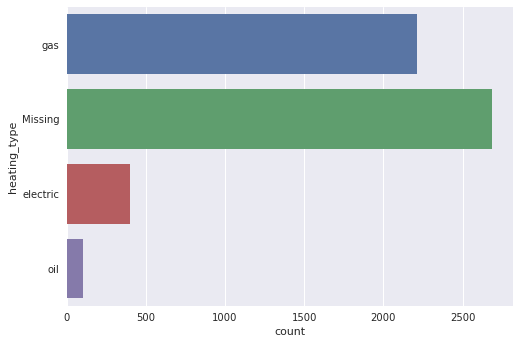

In [7]:
sns.countplot(y='heating_type', data=df)

In [8]:
df.head()

,agent_name,county,description,first_published_date,image_url,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,price,price_change_summary.direction,price_change_summary.percent,price_modifier,property_type,short_description,two_and_two,heating_type
0,Archibald Sharp,Glasgow,Ideally located is this spacious and versati...,2017-08-18 19:37:37,https://lid.zoocdn.com/354/255/bce49b68d0623ca...,55.907925,44776295,-4.317179,Missing,1,3,0,1,G61,Glasgow,285000,Missing,Missing,offers_over,Detached house,New! Superb opportunity. Three bedroom detache...,0,gas
1,Your Move,Dundee,* Fully refurbished top floor flat forming par...,2017-03-02 11:42:16,https://lid.zoocdn.com/354/255/d081aa6546c090c...,56.457645,43117360,-2.974642,Missing,0,4,0,0,DD1,Dundee,140000,Missing,Missing,offers_over,Flat,* Fully refurbished top floor flat forming p...,0,gas
2,Tailor Made Moves Ltd,Highland,Fantastic opportunity to purchase an immaculat...,2017-03-15 21:23:00,https://li.zoocdn.com/c8be5d15138fd49cb3d5d4b1...,57.570213,43255793,-4.179085,Missing,2,4,0,1,IV9,Avoch,260000,down,-3.7%,fixed_price,Detached house,Fantastic opportunity to purchase an immaculat...,0,gas
3,Persimmon Homes - Lathro Meadows,Perth & Kinross,This development offers the following schemes:...,2017-07-18 21:37:51,https://li.zoocdn.com/8f88c9c36e4495dd5d756a04...,56.220070,44484655,-3.425564,True,2,3,2,2,KY13,Kinross,157000,Missing,Missing,Missing,End terrace house,Help to Buy (Scotland) scheme available. The ...,0,Missing
4,Moveo Estate Agents,Glasgow,Moveo Estate Agents are delighted to present t...,2017-08-29 03:05:15,https://lid.zoocdn.com/354/255/1cb5322e21c8a08...,55.811690,44853759,-4.252225,Missing,1,2,0,1,G44,Glasgow,145000,Missing,Missing,offers_over,Semi-detached house,Moveo Estate Agents are delighted to present t...,0,gas


### Add EPC rating

In [9]:
#import re
#epc_rating = []
#keyword = re.compile('(EPC Rating -|EPC rating -|EPC=|EPC rating:|EPC Rating:)\s*(\S)')


#for row in df['description']:
#    match = re.search(keyword, row)
#    if match:
#        epc_rating.append(match.group(2))
#    else:
#        epc_rating.append('Missing')
#df['epc_rating'] = epc_rating

In [10]:
#sns.countplot(y='epc_rating', data=df)

### Double glazing

In [9]:
double_glazing = []
keyword = ['double glazing', 'Double Glazing', 'Double glazing', 'D\G', 'D/G']
for row in df['description']:
    if any( word in row for word in keyword):
        double_glazing.append('1')
    else:
        double_glazing.append('0')
df['double_glazing'] = double_glazing

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


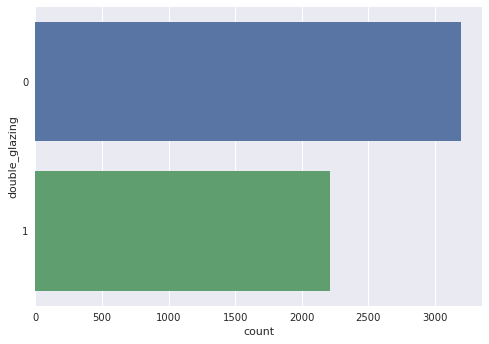

In [10]:
sns.countplot(y='double_glazing', data=df)

### Renovation

In [11]:
renovated = []
keyword = ['Refurbished', 'refurbished', 'renovated', 'Renovated', 'Redecorated', 'redecorated']
for row in df['description']:
    if any( word in row for word in keyword):
        renovated.append('1')
    else:
        renovated.append('0')
df['renovated'] = renovated

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


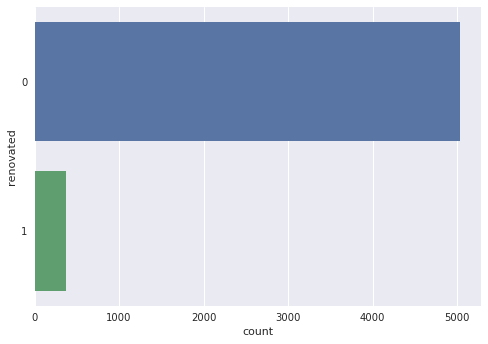

In [12]:
sns.countplot(y='renovated', data=df)

In [13]:
df.to_csv('data/feature_engineered_with_features.csv', index=None)

In [14]:
df.head()

,agent_name,county,description,first_published_date,image_url,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,price,price_change_summary.direction,price_change_summary.percent,price_modifier,property_type,short_description,two_and_two,heating_type,double_glazing,renovated
0,Archibald Sharp,Glasgow,Ideally located is this spacious and versati...,2017-08-18 19:37:37,https://lid.zoocdn.com/354/255/bce49b68d0623ca...,55.907925,44776295,-4.317179,Missing,1,3,0,1,G61,Glasgow,285000,Missing,Missing,offers_over,Detached house,New! Superb opportunity. Three bedroom detache...,0,gas,1,0
1,Your Move,Dundee,* Fully refurbished top floor flat forming par...,2017-03-02 11:42:16,https://lid.zoocdn.com/354/255/d081aa6546c090c...,56.457645,43117360,-2.974642,Missing,0,4,0,0,DD1,Dundee,140000,Missing,Missing,offers_over,Flat,* Fully refurbished top floor flat forming p...,0,gas,0,1
2,Tailor Made Moves Ltd,Highland,Fantastic opportunity to purchase an immaculat...,2017-03-15 21:23:00,https://li.zoocdn.com/c8be5d15138fd49cb3d5d4b1...,57.570213,43255793,-4.179085,Missing,2,4,0,1,IV9,Avoch,260000,down,-3.7%,fixed_price,Detached house,Fantastic opportunity to purchase an immaculat...,0,gas,1,0
3,Persimmon Homes - Lathro Meadows,Perth & Kinross,This development offers the following schemes:...,2017-07-18 21:37:51,https://li.zoocdn.com/8f88c9c36e4495dd5d756a04...,56.220070,44484655,-3.425564,True,2,3,2,2,KY13,Kinross,157000,Missing,Missing,Missing,End terrace house,Help to Buy (Scotland) scheme available. The ...,0,Missing,0,0
4,Moveo Estate Agents,Glasgow,Moveo Estate Agents are delighted to present t...,2017-08-29 03:05:15,https://lid.zoocdn.com/354/255/1cb5322e21c8a08...,55.811690,44853759,-4.252225,Missing,1,2,0,1,G44,Glasgow,145000,Missing,Missing,offers_over,Semi-detached house,Moveo Estate Agents are delighted to present t...,0,gas,1,0


In [15]:
# Remove unused features
df = df.drop(['agent_name', 'description', 'outcode','short_description'], axis=1)

In [16]:
df.head()


,county,first_published_date,image_url,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,post_town,price,price_change_summary.direction,price_change_summary.percent,price_modifier,property_type,two_and_two,heating_type,double_glazing,renovated
0,Glasgow,2017-08-18 19:37:37,https://lid.zoocdn.com/354/255/bce49b68d0623ca...,55.907925,44776295,-4.317179,Missing,1,3,0,1,Glasgow,285000,Missing,Missing,offers_over,Detached house,0,gas,1,0
1,Dundee,2017-03-02 11:42:16,https://lid.zoocdn.com/354/255/d081aa6546c090c...,56.457645,43117360,-2.974642,Missing,0,4,0,0,Dundee,140000,Missing,Missing,offers_over,Flat,0,gas,0,1
2,Highland,2017-03-15 21:23:00,https://li.zoocdn.com/c8be5d15138fd49cb3d5d4b1...,57.570213,43255793,-4.179085,Missing,2,4,0,1,Avoch,260000,down,-3.7%,fixed_price,Detached house,0,gas,1,0
3,Perth & Kinross,2017-07-18 21:37:51,https://li.zoocdn.com/8f88c9c36e4495dd5d756a04...,56.220070,44484655,-3.425564,True,2,3,2,2,Kinross,157000,Missing,Missing,Missing,End terrace house,0,Missing,0,0
4,Glasgow,2017-08-29 03:05:15,https://lid.zoocdn.com/354/255/1cb5322e21c8a08...,55.811690,44853759,-4.252225,Missing,1,2,0,1,Glasgow,145000,Missing,Missing,offers_over,Semi-detached house,0,gas,1,0


In [17]:
# Age of the ad
from datetime import datetime

df['today'] = pd.to_datetime(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
df['date_published'] = pd.to_datetime(df['first_published_date'])
df['ad_age_days'] = (df['today'] - df['date_published']).dt.days

In [18]:
# Remove % sign from price change
df['price_change_summary.percent'] = df['price_change_summary.percent'].str.replace('%', '')
# Remove redundant features
df = df.drop(['first_published_date', 'price_change_summary.direction', 'today','date_published'], axis=1)


In [19]:
# Rename price change percent column so python doesn't complain about dot in the name
df = df.rename(columns={'price_change_summary.percent': 'price_change_percent'})

# Replace missing percent data with 0 as missing data in this column = no change in price
df.price_change_percent.replace('Missing', 0, inplace=True)


In [20]:
df.head()

,county,image_url,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,post_town,price,price_change_percent,price_modifier,property_type,two_and_two,heating_type,double_glazing,renovated,ad_age_days
0,Glasgow,https://lid.zoocdn.com/354/255/bce49b68d0623ca...,55.907925,44776295,-4.317179,Missing,1,3,0,1,Glasgow,285000,0,offers_over,Detached house,0,gas,1,0,18
1,Dundee,https://lid.zoocdn.com/354/255/d081aa6546c090c...,56.457645,43117360,-2.974642,Missing,0,4,0,0,Dundee,140000,0,offers_over,Flat,0,gas,0,1,187
2,Highland,https://li.zoocdn.com/c8be5d15138fd49cb3d5d4b1...,57.570213,43255793,-4.179085,Missing,2,4,0,1,Avoch,260000,-3.7,fixed_price,Detached house,0,gas,1,0,173
3,Perth & Kinross,https://li.zoocdn.com/8f88c9c36e4495dd5d756a04...,56.220070,44484655,-3.425564,True,2,3,2,2,Kinross,157000,0,Missing,End terrace house,0,Missing,0,0,48
4,Glasgow,https://lid.zoocdn.com/354/255/1cb5322e21c8a08...,55.811690,44853759,-4.252225,Missing,1,2,0,1,Glasgow,145000,0,offers_over,Semi-detached house,0,gas,1,0,7


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


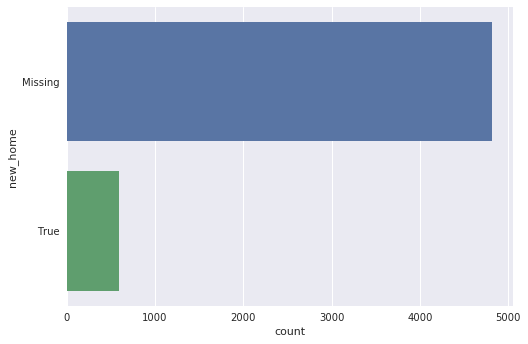

In [21]:
sns.countplot(y='new_home', data=df)

In [22]:
# Replace new home values with 1 and 0
df.new_home.replace('Missing', 0, inplace=True)
df.new_home.replace('True', 1, inplace=True)
df.head()

,county,image_url,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,post_town,price,price_change_percent,price_modifier,property_type,two_and_two,heating_type,double_glazing,renovated,ad_age_days
0,Glasgow,https://lid.zoocdn.com/354/255/bce49b68d0623ca...,55.907925,44776295,-4.317179,0,1,3,0,1,Glasgow,285000,0,offers_over,Detached house,0,gas,1,0,18
1,Dundee,https://lid.zoocdn.com/354/255/d081aa6546c090c...,56.457645,43117360,-2.974642,0,0,4,0,0,Dundee,140000,0,offers_over,Flat,0,gas,0,1,187
2,Highland,https://li.zoocdn.com/c8be5d15138fd49cb3d5d4b1...,57.570213,43255793,-4.179085,0,2,4,0,1,Avoch,260000,-3.7,fixed_price,Detached house,0,gas,1,0,173
3,Perth & Kinross,https://li.zoocdn.com/8f88c9c36e4495dd5d756a04...,56.220070,44484655,-3.425564,1,2,3,2,2,Kinross,157000,0,Missing,End terrace house,0,Missing,0,0,48
4,Glasgow,https://lid.zoocdn.com/354/255/1cb5322e21c8a08...,55.811690,44853759,-4.252225,0,1,2,0,1,Glasgow,145000,0,offers_over,Semi-detached house,0,gas,1,0,7


In [23]:
df.to_csv('data/for_db_with_features.csv', index=None)

In [24]:
# Remove images
df = df.drop(['image_url'], axis=1)

In [25]:
df.head()

,county,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,post_town,price,price_change_percent,price_modifier,property_type,two_and_two,heating_type,double_glazing,renovated,ad_age_days
0,Glasgow,55.907925,44776295,-4.317179,0,1,3,0,1,Glasgow,285000,0,offers_over,Detached house,0,gas,1,0,18
1,Dundee,56.457645,43117360,-2.974642,0,0,4,0,0,Dundee,140000,0,offers_over,Flat,0,gas,0,1,187
2,Highland,57.570213,43255793,-4.179085,0,2,4,0,1,Avoch,260000,-3.7,fixed_price,Detached house,0,gas,1,0,173
3,Perth & Kinross,56.220070,44484655,-3.425564,1,2,3,2,2,Kinross,157000,0,Missing,End terrace house,0,Missing,0,0,48
4,Glasgow,55.811690,44853759,-4.252225,0,1,2,0,1,Glasgow,145000,0,offers_over,Semi-detached house,0,gas,1,0,7


In [26]:
from geopy.distance import great_circle

In [27]:
edinburgh_coord = (55.957070, -3.236022)
distance = []
for lat, lon in zip(df['latitude'], df['longitude']):
    loc_coord = (lat, lon)
    distance.append(great_circle(edinburgh_coord, loc_coord).miles)
df['distance_edi'] = distance

In [28]:
df.head()

,county,latitude,listing_id,longitude,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,post_town,price,price_change_percent,price_modifier,property_type,two_and_two,heating_type,double_glazing,renovated,ad_age_days,distance_edi
0,Glasgow,55.907925,44776295,-4.317179,0,1,3,0,1,Glasgow,285000,0,offers_over,Detached house,0,gas,1,0,18,41.993990
1,Dundee,56.457645,43117360,-2.974642,0,0,4,0,0,Dundee,140000,0,offers_over,Flat,0,gas,0,1,187,36.025512
2,Highland,57.570213,43255793,-4.179085,0,2,4,0,1,Avoch,260000,-3.7,fixed_price,Detached house,0,gas,1,0,173,117.069349
3,Perth & Kinross,56.220070,44484655,-3.425564,1,2,3,2,2,Kinross,157000,0,Missing,End terrace house,0,Missing,0,0,48,19.590932
4,Glasgow,55.811690,44853759,-4.252225,0,1,2,0,1,Glasgow,145000,0,offers_over,Semi-detached house,0,gas,1,0,7,40.651832


In [30]:
# Create new dataframe with dummy features
df = df.drop(['post_town'], axis=1)
df = df.drop(['county'],axis=1)
df = df.drop(['latitude', 'longitude'],axis=1)
df = pd.get_dummies(df, columns=['price_modifier', 'property_type','heating_type'])
#df = pd.get_dummies(df, columns=['county','post_town', 'price_modifier', 'property_type'])


ValueError: labels ['post_town'] not contained in axis

In [31]:
# Save analytical base table
df.to_csv('data/analytical_base_table_with_features_no_loc.csv', index=None)

In [32]:
df.head()


,listing_id,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,price,price_change_percent,two_and_two,double_glazing,renovated,ad_age_days,distance_edi,price_modifier_Missing,price_modifier_equity_loan,price_modifier_fixed_price,price_modifier_from,price_modifier_guide_price,price_modifier_offers_in_region_of,price_modifier_offers_over,price_modifier_price_on_request,property_type_Bungalow,property_type_Detached house,property_type_End terrace house,property_type_Flat,property_type_Maisonette,property_type_Missing,property_type_Other,property_type_Semi-detached house,property_type_Terraced house,heating_type_Missing,heating_type_electric,heating_type_gas,heating_type_oil
0,44776295,0,1,3,0,1,285000,0,0,1,0,18,41.993990,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,43117360,0,0,4,0,0,140000,0,0,0,1,187,36.025512,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,43255793,0,2,4,0,1,260000,-3.7,0,1,0,173,117.069349,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,44484655,1,2,3,2,2,157000,0,0,0,0,48,19.590932,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,44853759,0,1,2,0,1,145000,0,0,1,0,7,40.651832,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [33]:
df.shape

(5404, 34)